In [84]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.font_manager import FontProperties
import seaborn as sns
from glob import glob
import numpy as np
import matplotlib
import os
# matplotlib.rcParams.update({'font.size': 22})

In [85]:
def ParseFimo(fimo_output_file):
    
    ### read fimo output file
    motif_locs = pd.read_csv(fimo_output_file, sep='\t')
    
    ### filter for motifs with score > 0
    motif_locs = motif_locs[motif_locs['score'] > 0]
    
    ### extract some basic info
    motif_locs['anchor_gene'] = motif_locs['sequence_name'].str.split(':').str[0]
    motif_locs['midpoint'] = (motif_locs['start'] + motif_locs['stop']) / 2
    
    return motif_locs

In [106]:
def plot_hist(df, bins=20):
    fig = plt.figure(figsize=(4, 4))
    fig.patch.set_facecolor("white")
    plt.title(df['# motif_id'][0])
    df.score.hist(bins=bins)
    plt.show()

# What is the distribution of fimo scores for the binding sites? 

## Individual TF-Promoter

In [109]:
data = [ ]
i = 0

df_all_hits = None

for fimo_out in glob('./promoter_motifs_results/*_fimo/fimo.txt'):
    selected_tf = os.path.basename(os.path.dirname(fimo_out)).split('_')[0]
    
    df_motif_hits = ParseFimo(fimo_out)
    if len(df_motif_hits) > 0:
        if df_all_hits is None: 
            df_all_hits = df_motif_hits.copy()
        else:
            df_all_hits = df_all_hits.merge(df_motif_hits, how='outer')
            
        #plot_hist(df_motif_hits)

        max_score  = np.round(df_motif_hits['score'].abs().max(), 1)
        min_score  = np.round(df_motif_hits['score'].abs().min(), 1)
        mean_score = np.round(df_motif_hits['score'].abs().mean(), 1)
        motif_id = df_motif_hits['# motif_id'][0]

        row = [motif_id, min_score, max_score, mean_score]
        data.append(row)
         
        i += 1
        if i > 55555:
            break

df_indiv_hit_stats = pd.DataFrame(data, columns=['motif_id', 'min_score', 'max_score', 'mean_score'])

duplicated


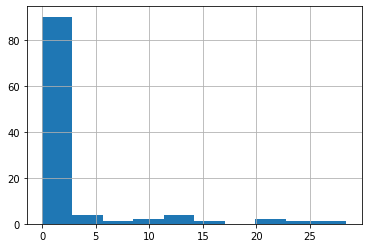

In [112]:
df_indiv_hit_stats.min_score.hist()

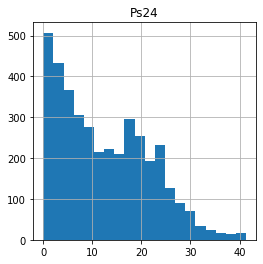

In [113]:
plot_hist(df_all_hits)